In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas

from sklearn.model_selection import train_test_split

from sklearn import metrics

from sklearn.linear_model import LinearRegression

In [2]:
house_df = pd.read_csv('House Price Prediction.csv', encoding= 'unicode_escape')

In [3]:
house_df.head()

,No,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
house_df.shape

(414, 8)

In [5]:
pd.isnull(house_df).sum()

No                                     0
transaction date                       0
house age                              0
distance to the nearest MRT station    0
number of convenience stores           0
latitude                               0
longitude                              0
house price of unit area               0
dtype: int64

In [6]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   No                                   414 non-null    int64  
 1   transaction date                     414 non-null    float64
 2   house age                            414 non-null    float64
 3   distance to the nearest MRT station  414 non-null    float64
 4   number of convenience stores         414 non-null    int64  
 5   latitude                             414 non-null    float64
 6   longitude                            414 non-null    float64
 7   house price of unit area             414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [7]:
house_df.corr()

,No,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
No,1.000000,-0.048658,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
transaction date,-0.048658,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
house age,-0.032808,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
distance to the nearest MRT station,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
number of convenience stores,-0.012699,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
latitude,-0.010110,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
longitude,-0.011059,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
house price of unit area,-0.028587,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


C:\Users\aebshanjida\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


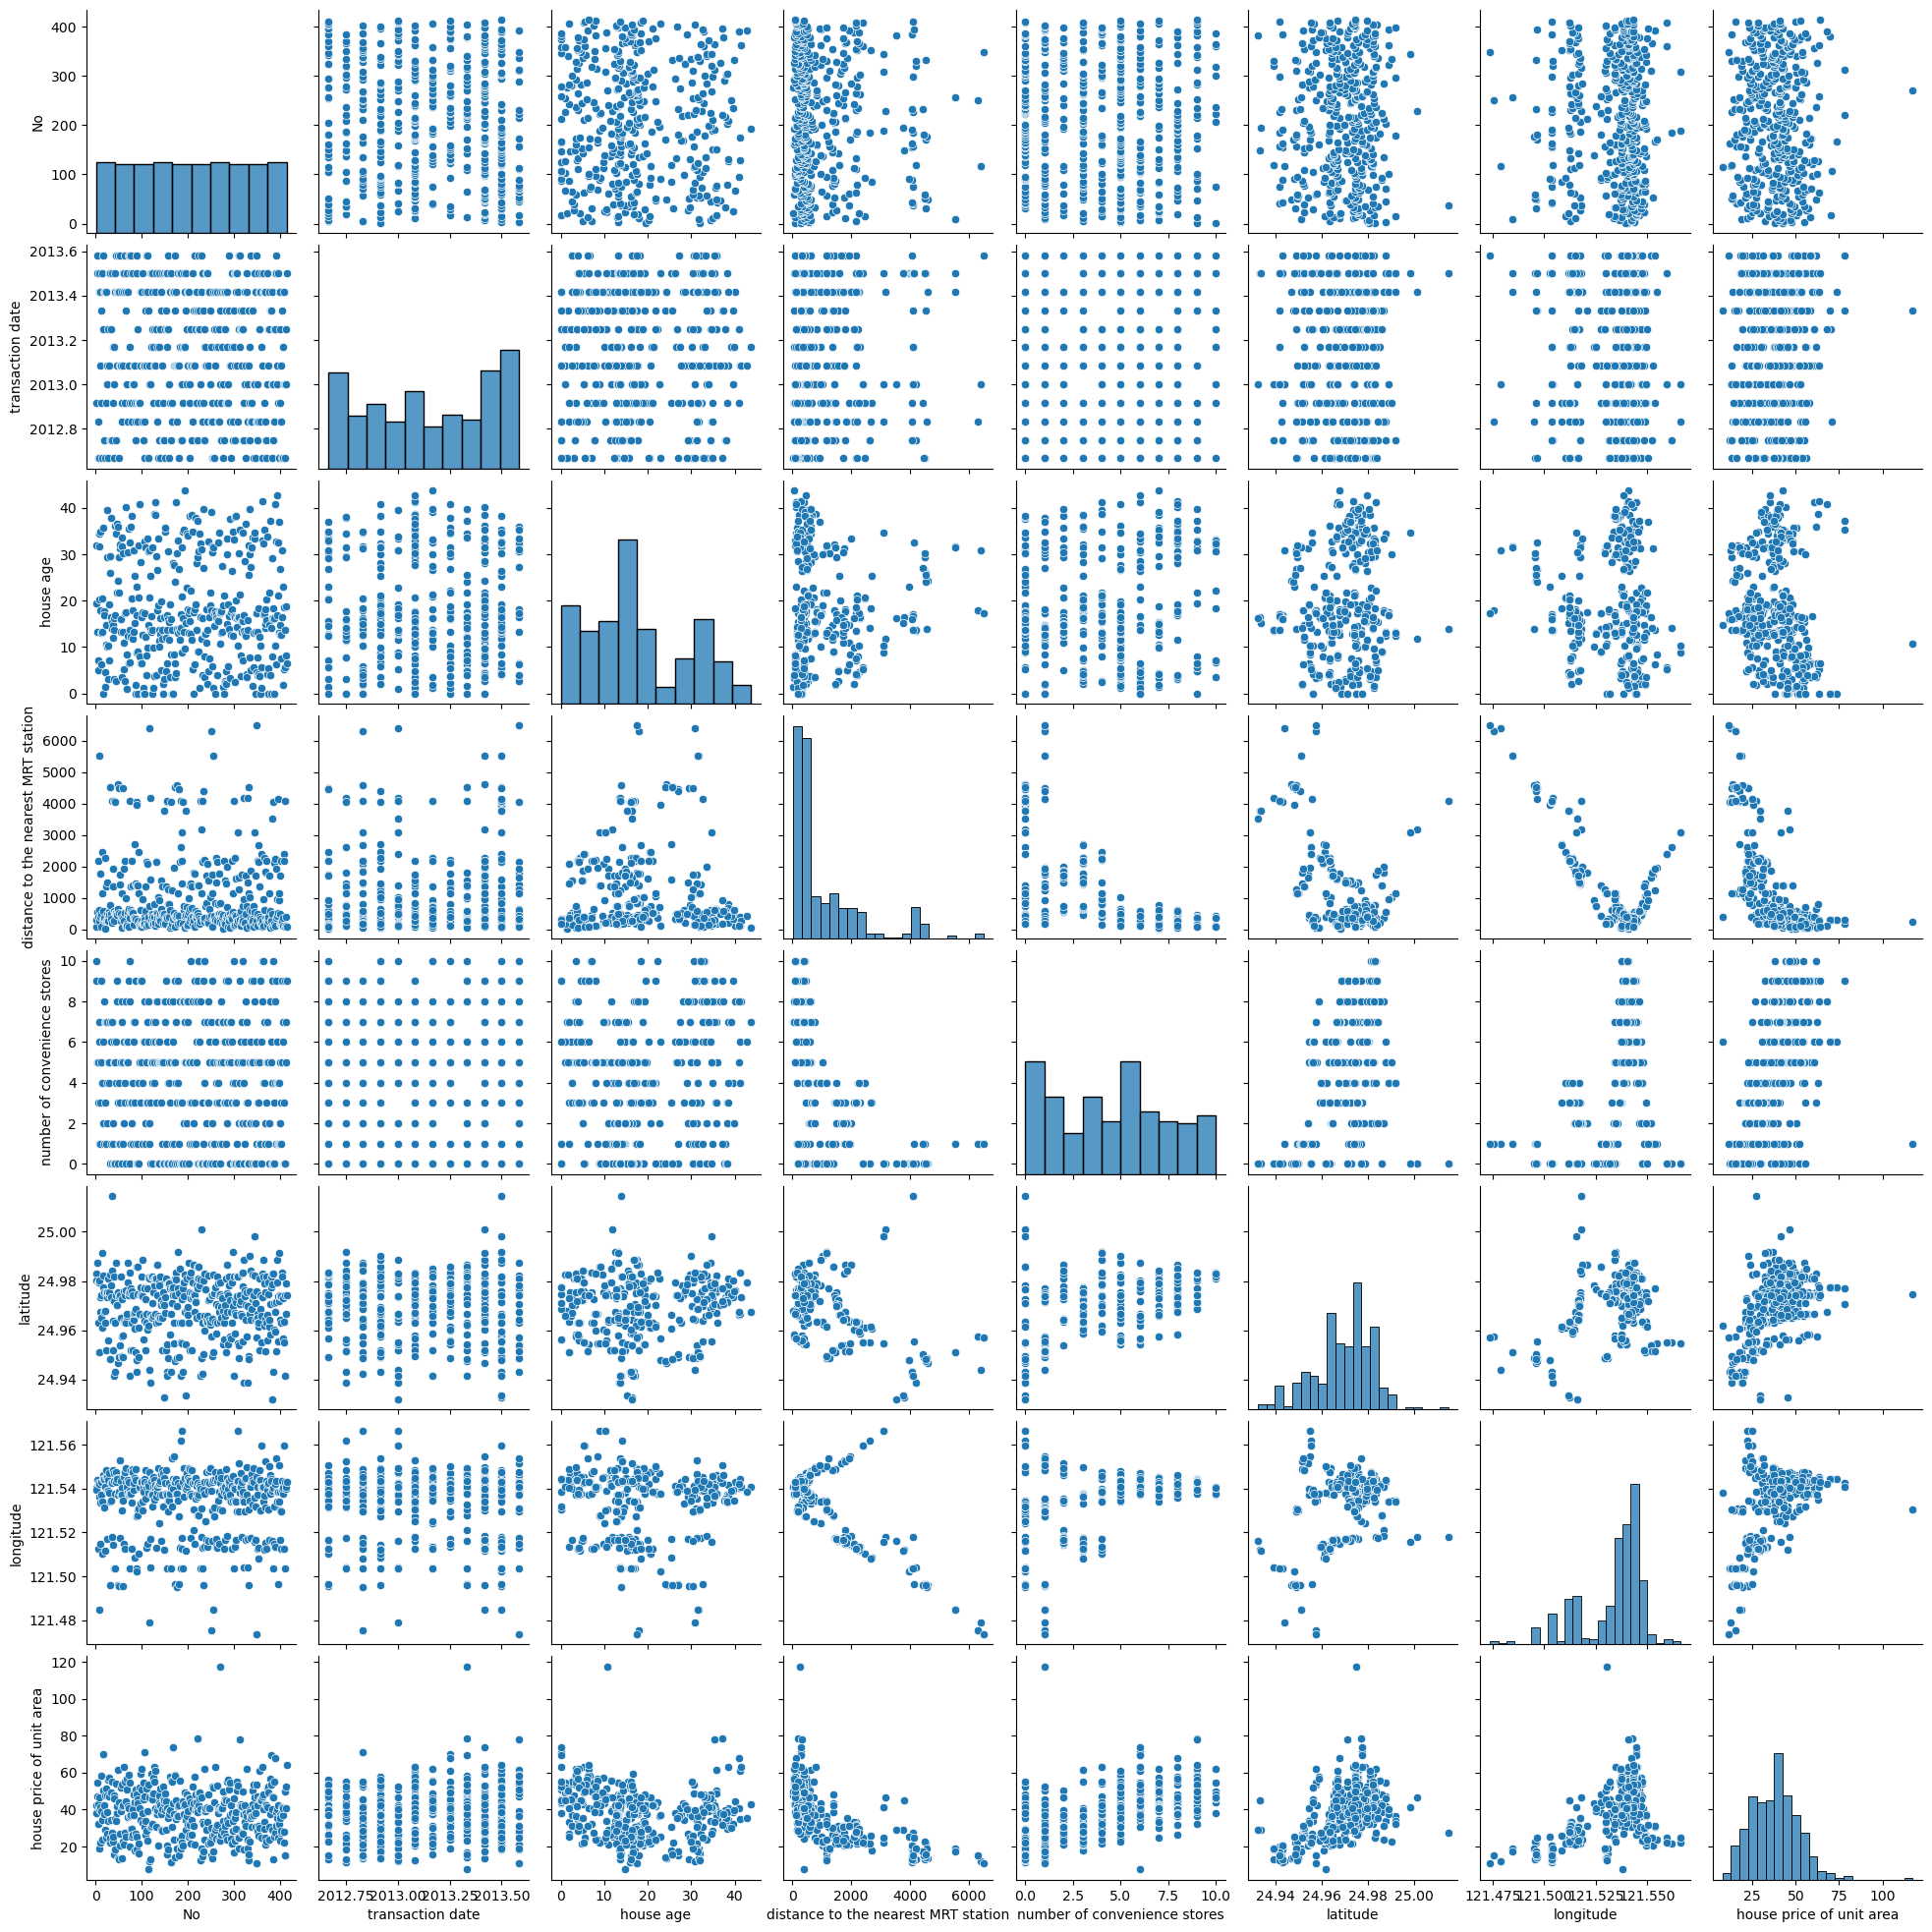

In [8]:
sns.pairplot(house_df)

In [9]:
X=house_df['number of convenience stores']
y=house_df['house price of unit area']

In [10]:
X.head()

0    10
1     9
2     5
3     5
4     5
Name: number of convenience stores, dtype: int64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [12]:
regression = LinearRegression()


In [13]:
X_train = np.array(X_train).reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)

In [14]:
regression.fit(X_train, y_train)

LinearRegression()

In [15]:
regression.coef_

array([[2.8092964]])

In [16]:
y_pred = regression.predict(X_test)

#y_pred_df = pd.DataFrame({'Predicted': y_pred})


In [17]:
MAE= metrics.mean_absolute_error(y_test, y_pred)
MSE=metrics.mean_squared_error(y_test, y_pred)
RMSE= np.sqrt(MSE)

print(MAE)
print(MSE)
print(RMSE)

7.511478523411742
86.46972466304567
9.298909864228477


In [18]:
house_df['number of convenience stores'].mean()

4.094202898550725

C:\Users\aebshanjida\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


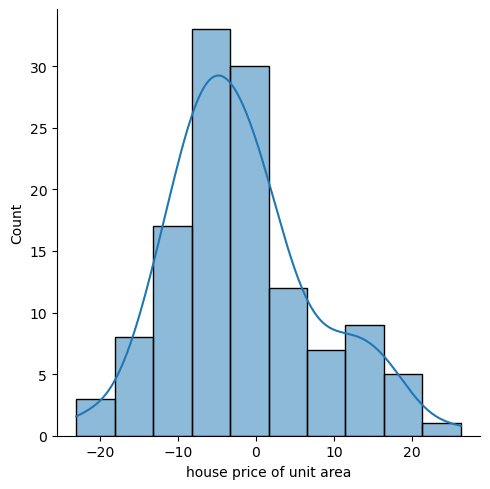

In [19]:
y_pred = y_pred.ravel()

test_residual= y_test - y_pred
sns.displot(test_residual, bins=10, kde=True)

In [20]:
import statsmodels.api as sm
dw_statistic = sm.stats.stattools.durbin_watson(test_residual)
dw_statistic

1.9960800515717863

### As Durbin-Watson test statistic is close to 2, typically in the range of 1.5 to 2.5, it suggests that there is no significant autocorrelation present in the residuals.

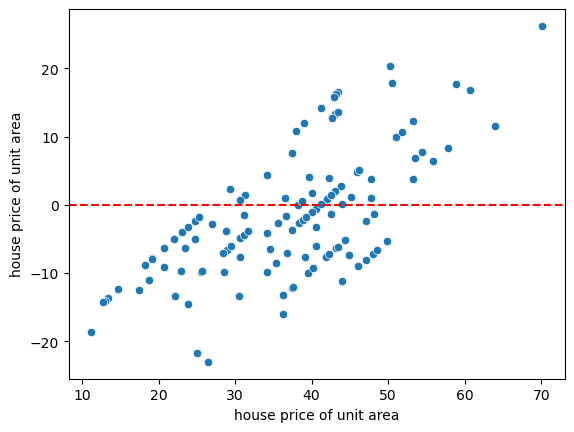

In [21]:
sns.scatterplot(x=y_test, y=test_residual)

plt.axhline(y=0, color='r', ls='--')

### In a linear regression context, if residual scatter plots show a pattern, it may suggest that there is some form of nonlinearity or systematic structure left in residuals that the model has not captured. it might be due to other issues like nonlinearity, omitted variables, or model misspecification. We should investigate and address these issues separately. 


### Autocorrelation would not be a primary concern in this case based on the Durbin-Watson result.